In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("Airline_data.csv")
df

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [10]:
mean_acc = df.loc[:,'Fatal accidents'].mean()
mean_pass = df.loc[:,'Passenger deaths'].mean()
mean_miles = df.loc[:,'Miles flown [100 mln miles]'].mean()

print ("mean value for accidents: {0}".format(mean_acc))
print ("mean value for passenger deaths: {0}".format(mean_pass))
print ("mean value for miles flown: {0}".format(mean_miles))

std_acc = df.loc[:,'Fatal accidents'].std()
std_pass = df.loc[:,'Passenger deaths'].std()
std_miles = df.loc[:,'Miles flown [100 mln miles]'].std()

print("\n")
print ("std value for accidents: {0}".format(std_acc))
print ("std value for passenger deaths: {0}".format(std_pass))
print ("std value for miles flown: {0}".format(std_miles))


mean value for accidents: 23.8
mean value for passenger deaths: 691.9
mean value for miles flown: 5715.8


std value for accidents: 4.7093288033198295
std value for passenger deaths: 252.3892276271359
std value for miles flown: 1117.767795404951


In [11]:
model_1=CmdStanModel(stan_file='lab5_1.stan')
sim=model_1.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=1000)

INFO:cmdstanpy:compiling stan file /home/lab5/lab5_1.stan to exe file /home/lab5/lab5_1
INFO:cmdstanpy:compiled model executable: /home/lab5/lab5_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


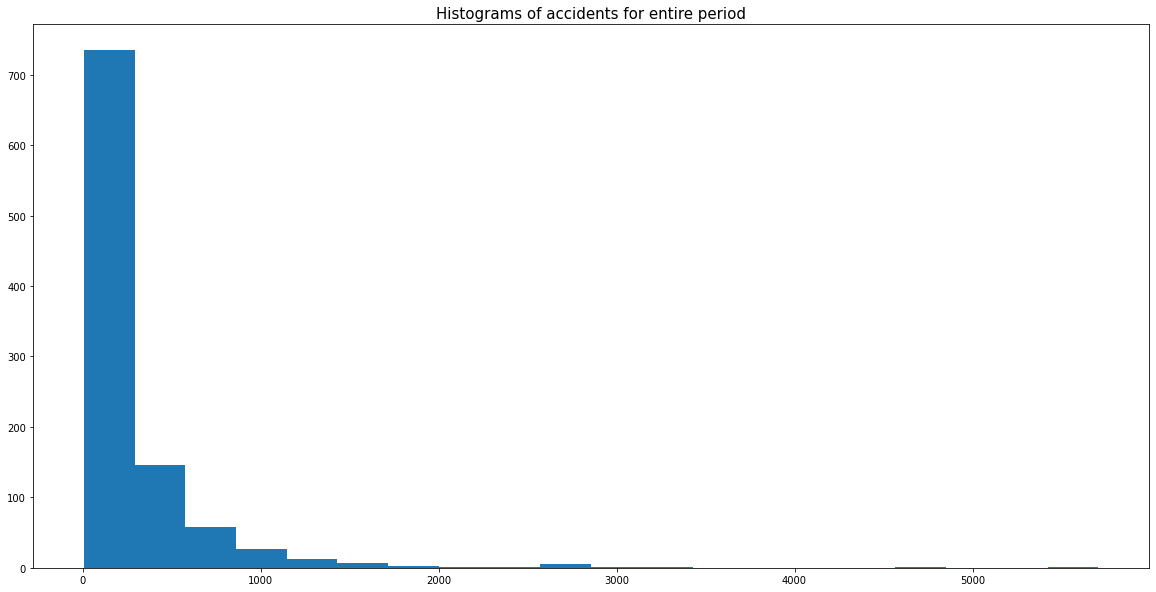

In [44]:
df1 = sim.draws_pd()
plt.figure(figsize = (20,10))
plt.hist(df1["y"],bins=20)
plt.title("Histograms of accidents for entire period",size = 15)
plt.show()

In [22]:
model_2=CmdStanModel(stan_file='lab5_2.stan')
data = {'N': df.shape[0], 'miles': df["Miles flown [100 mln miles]"].values, 'y': df["Fatal accidents"].values}
fit=model_2.sample(data=data,seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 I


INFO:cmdstanpy:CmdStan done processing.


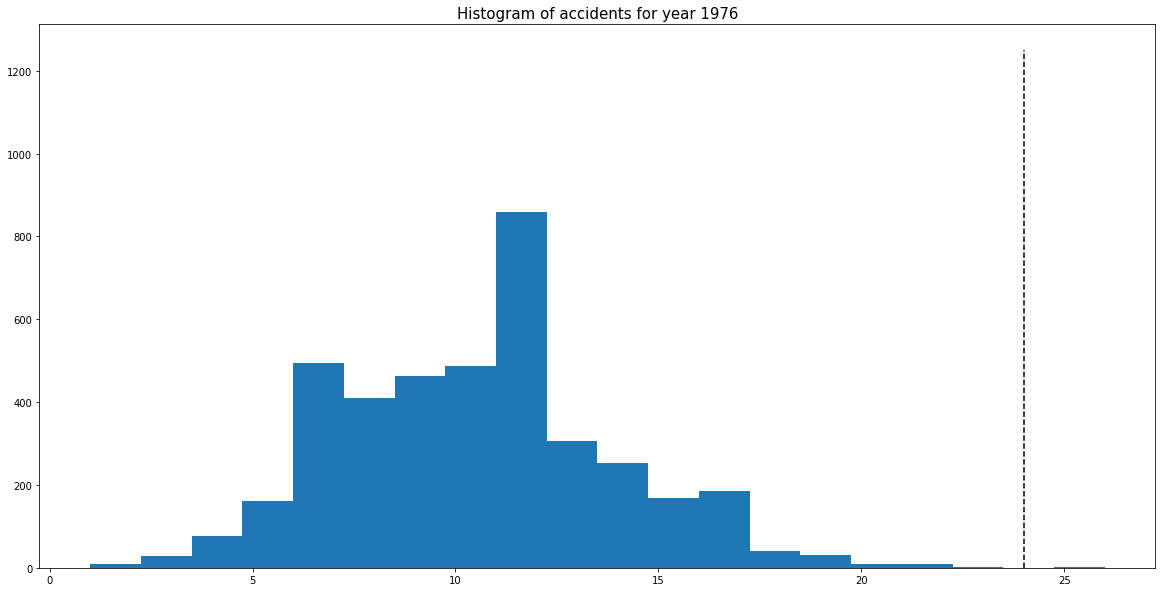

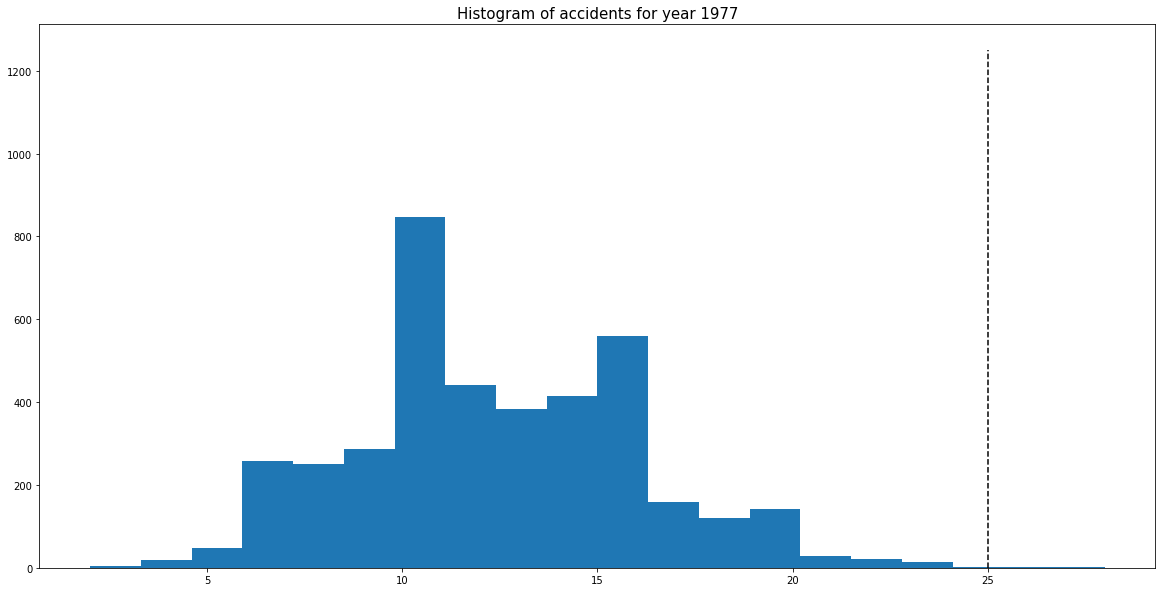

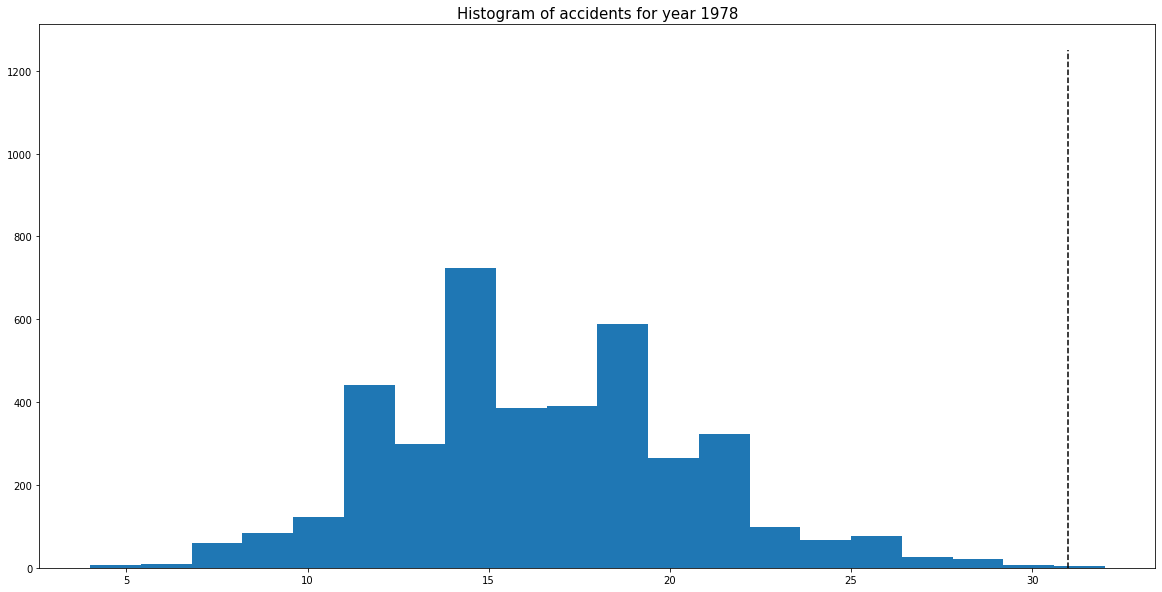

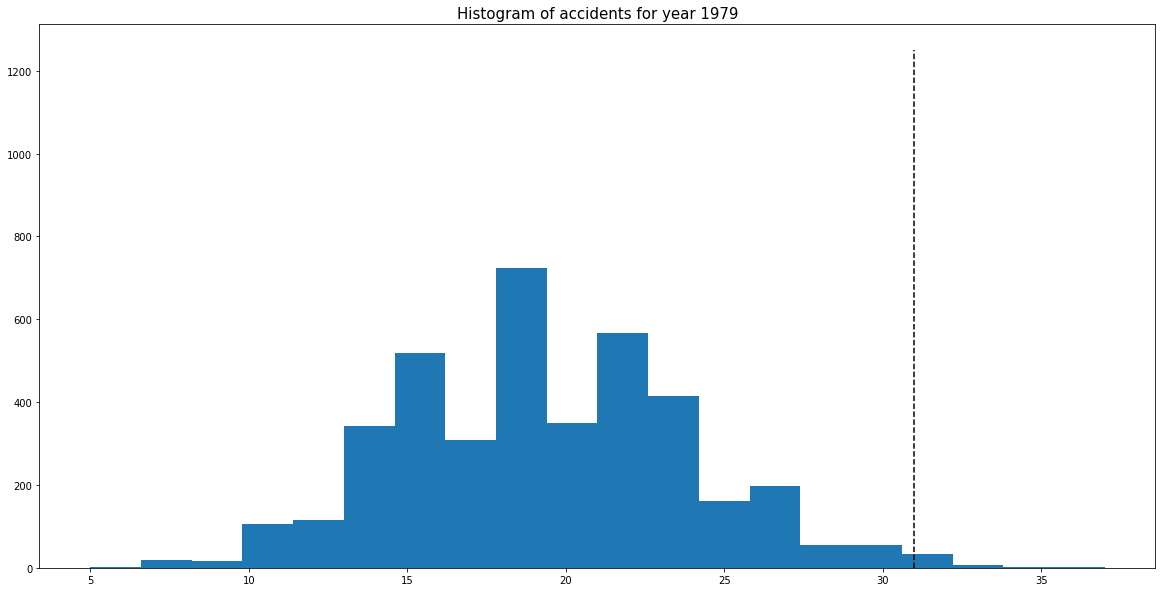

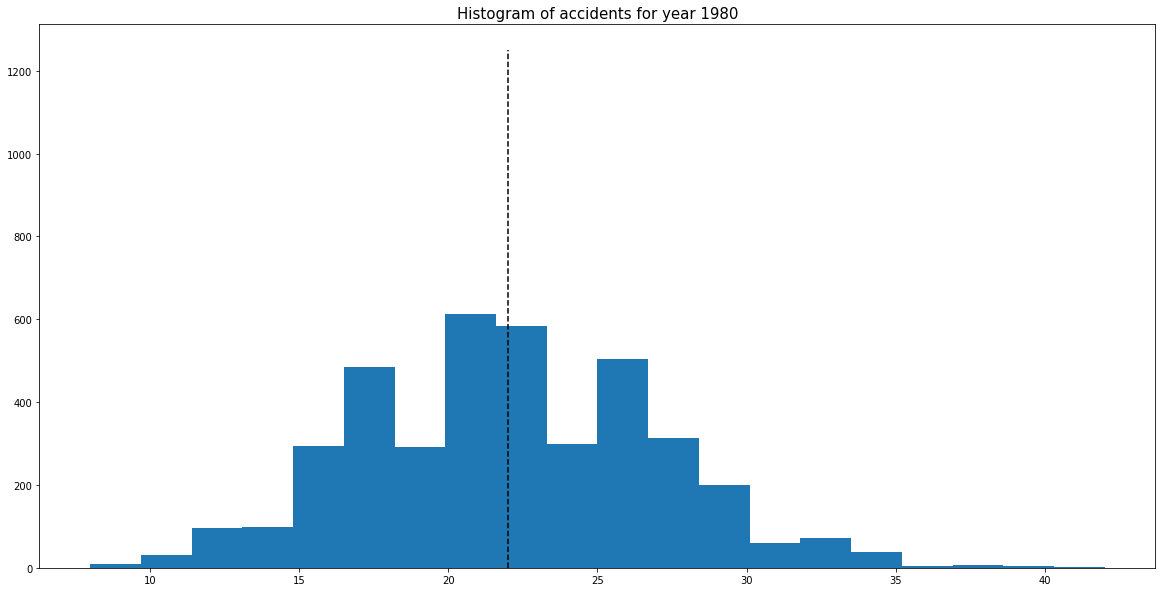

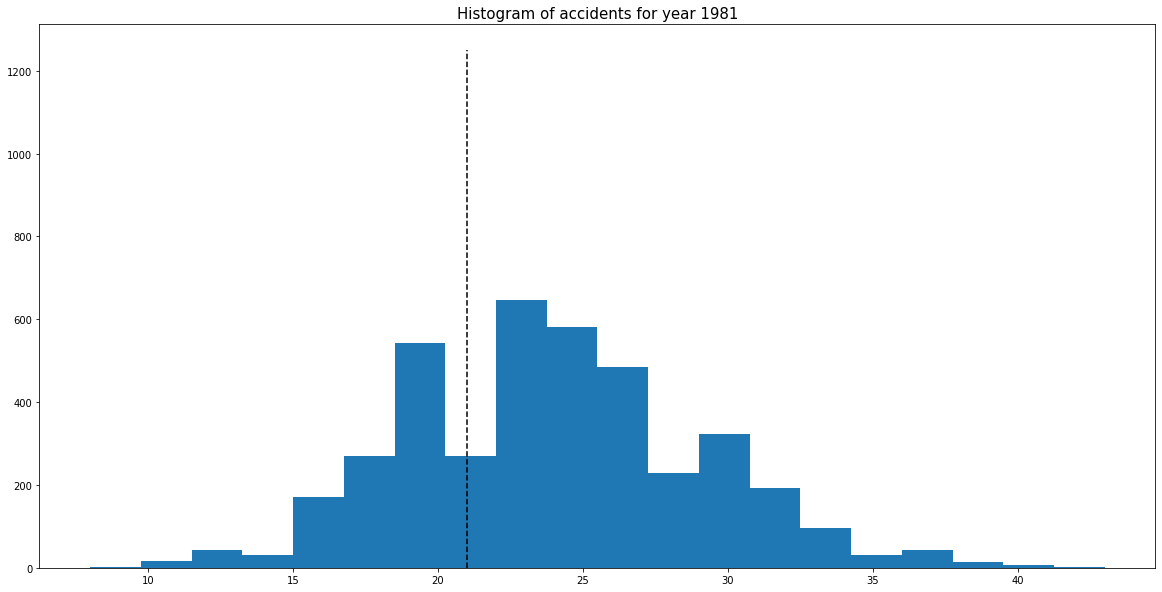

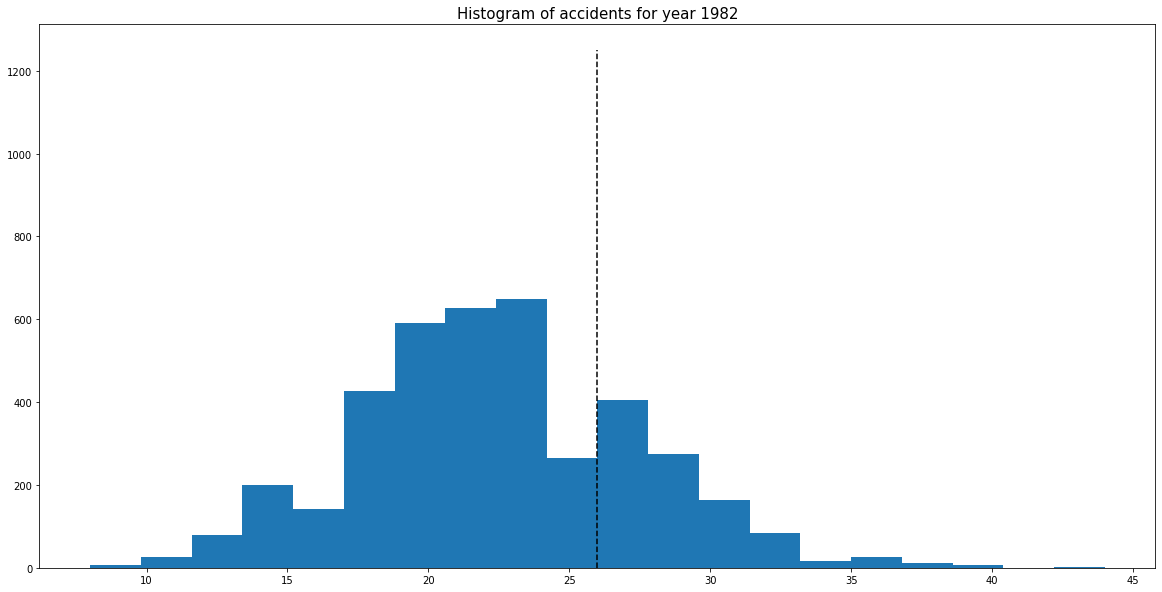

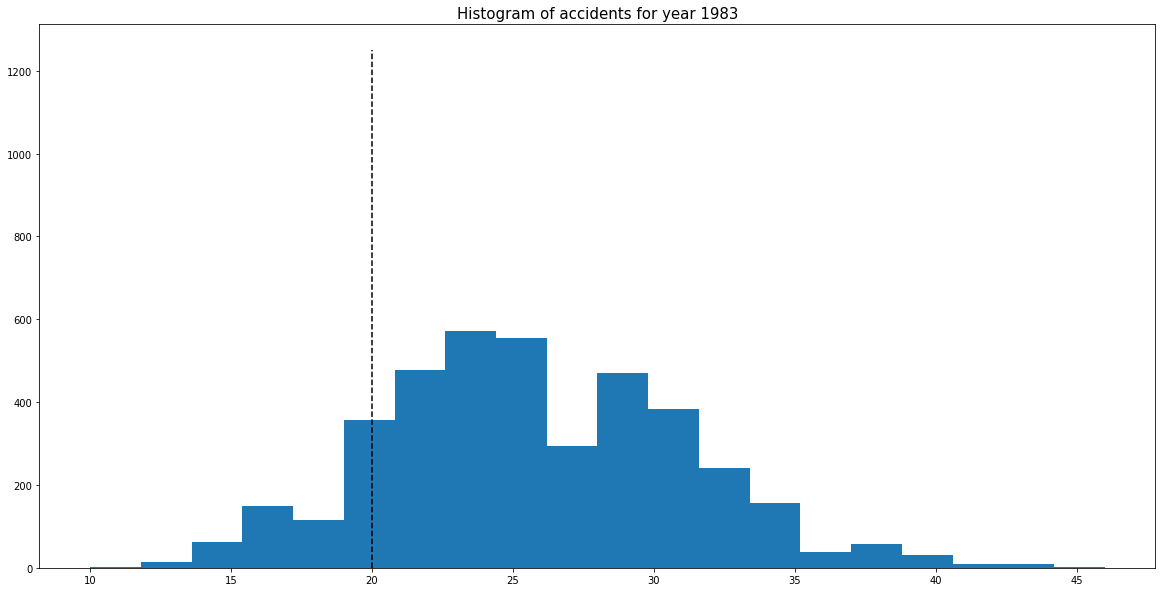

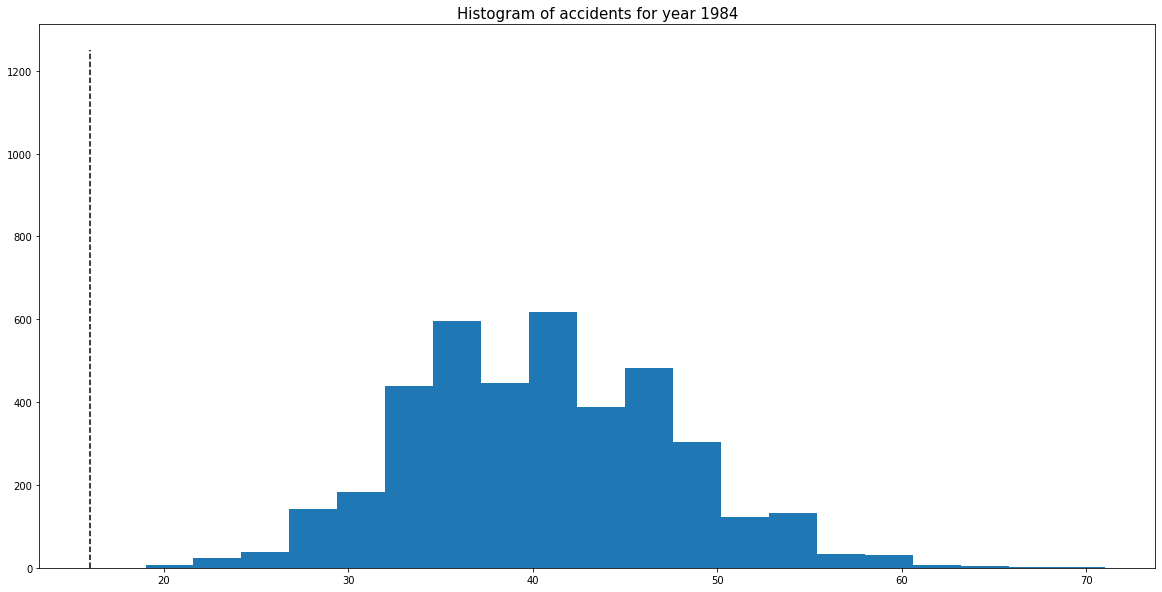

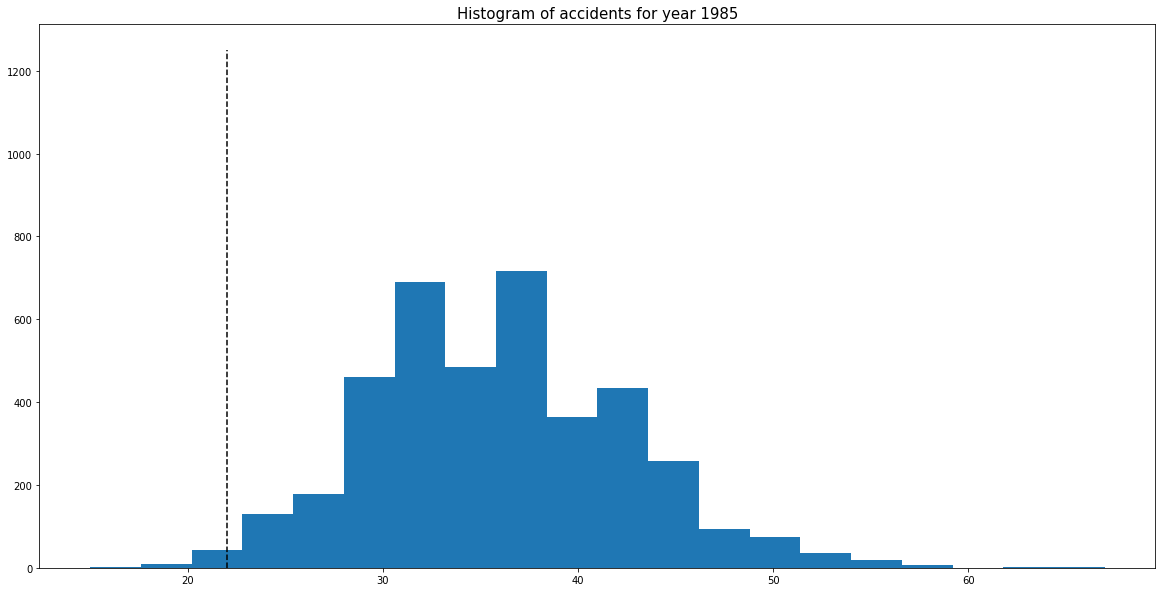

In [42]:
df2 = fit.draws_pd()
for i in range (1,11):
    plt.figure(figsize = (20,10))
    plt.hist(df2["y_pred[{0}]".format(i)],bins=20)
    real_accidents = df['Fatal accidents'].iloc[i-1]
    plt.plot([real_accidents,real_accidents],[0,1250],linestyle='--',color='black')
    plt.title("Histogram of accidents for year {0}".format(1975+i),size = 15)
    plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status







chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                


INFO:cmdstanpy:CmdStan done processing.


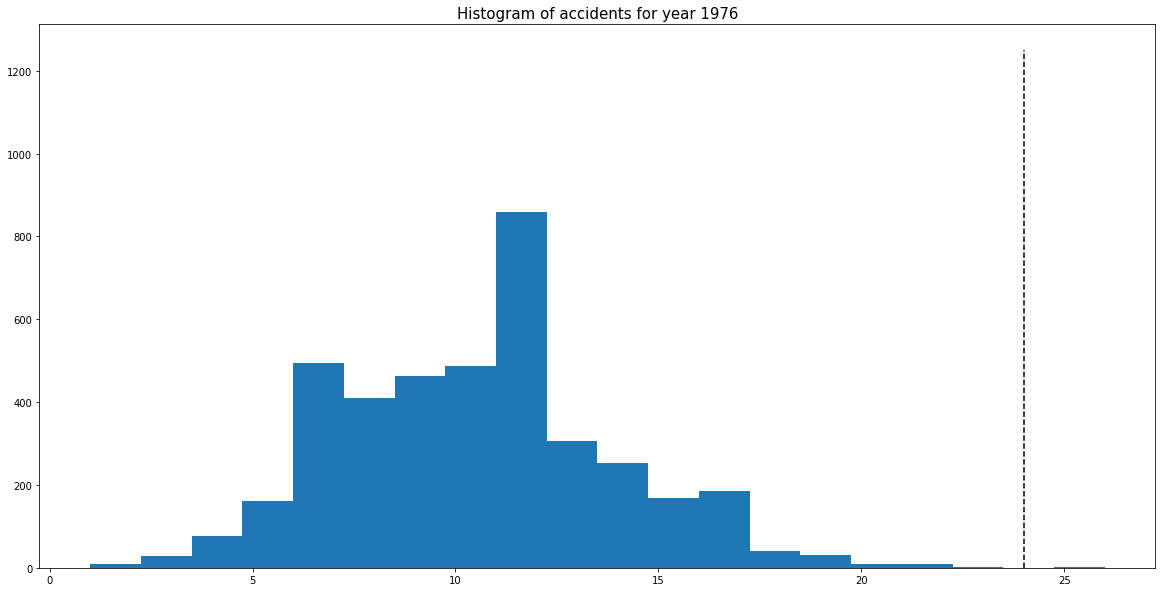

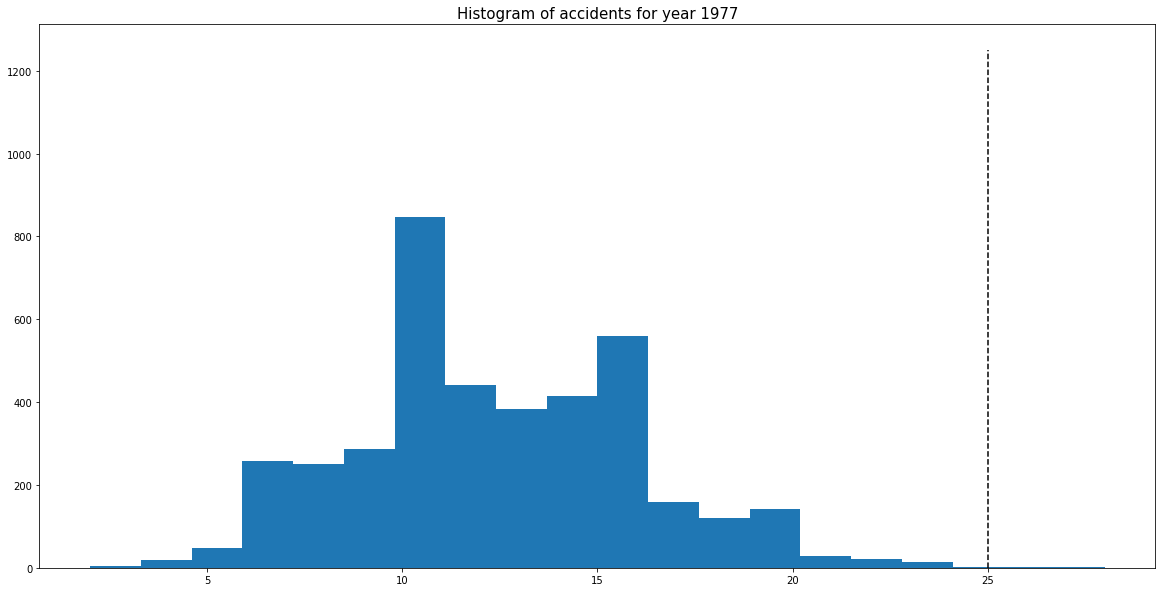

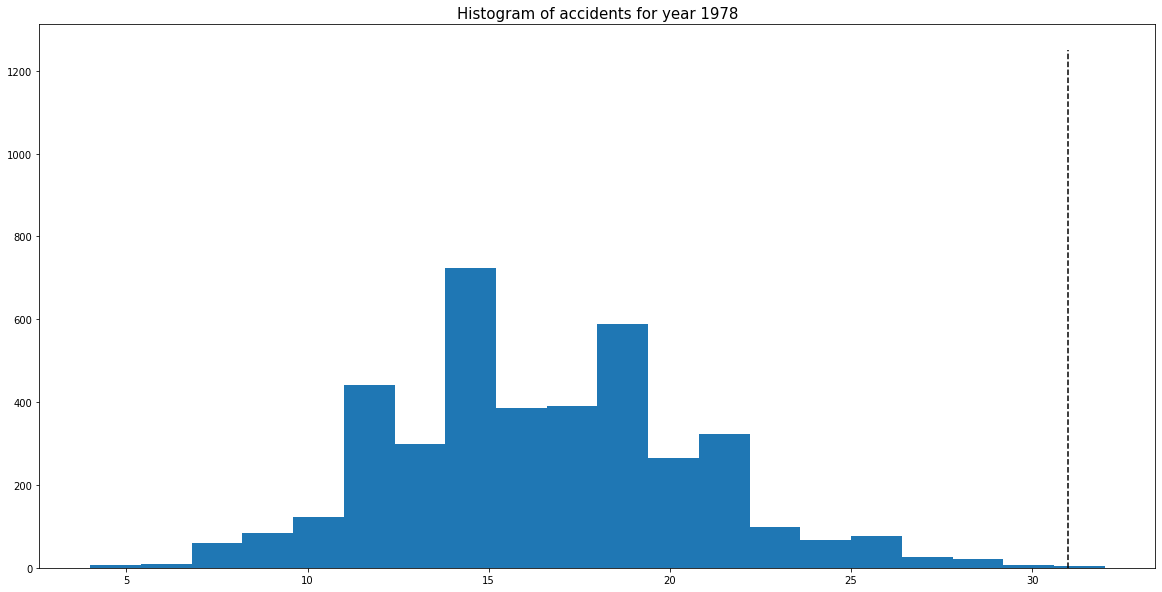

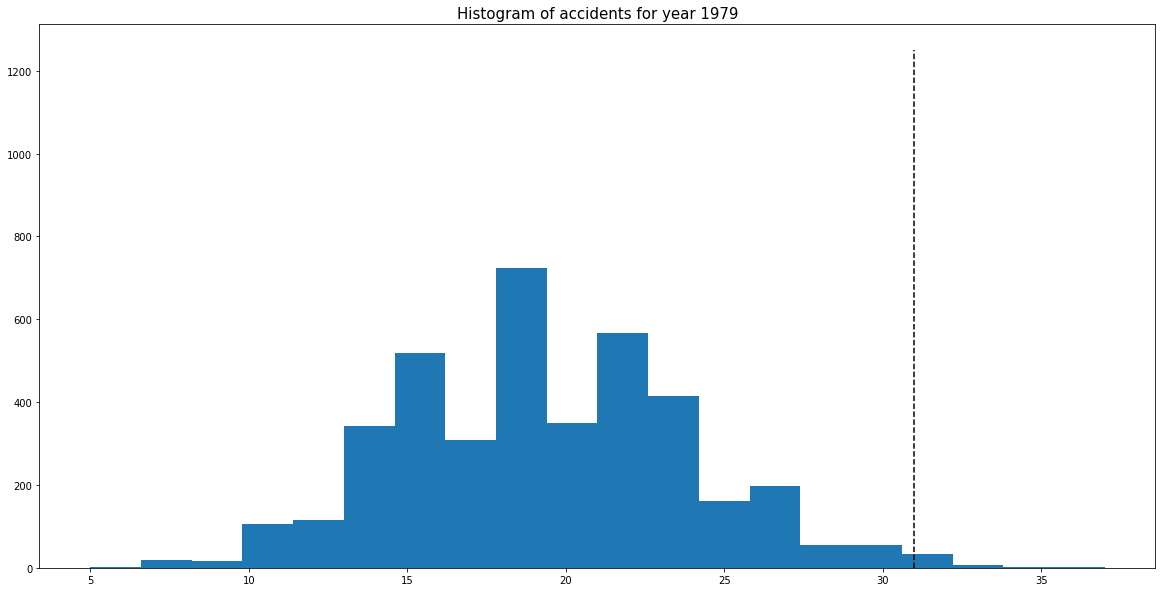

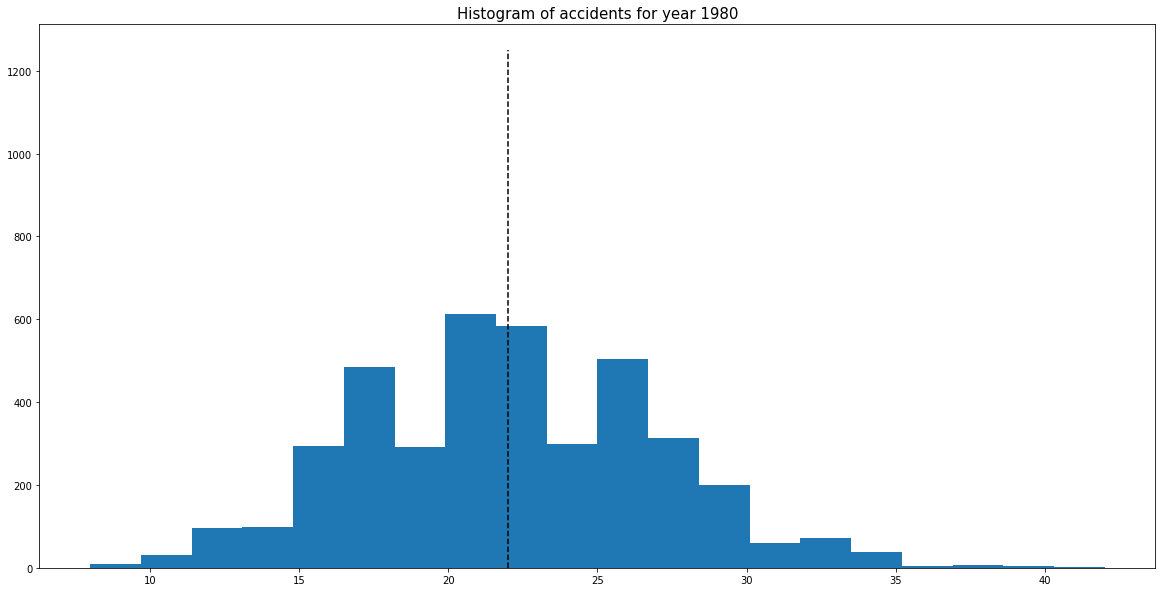

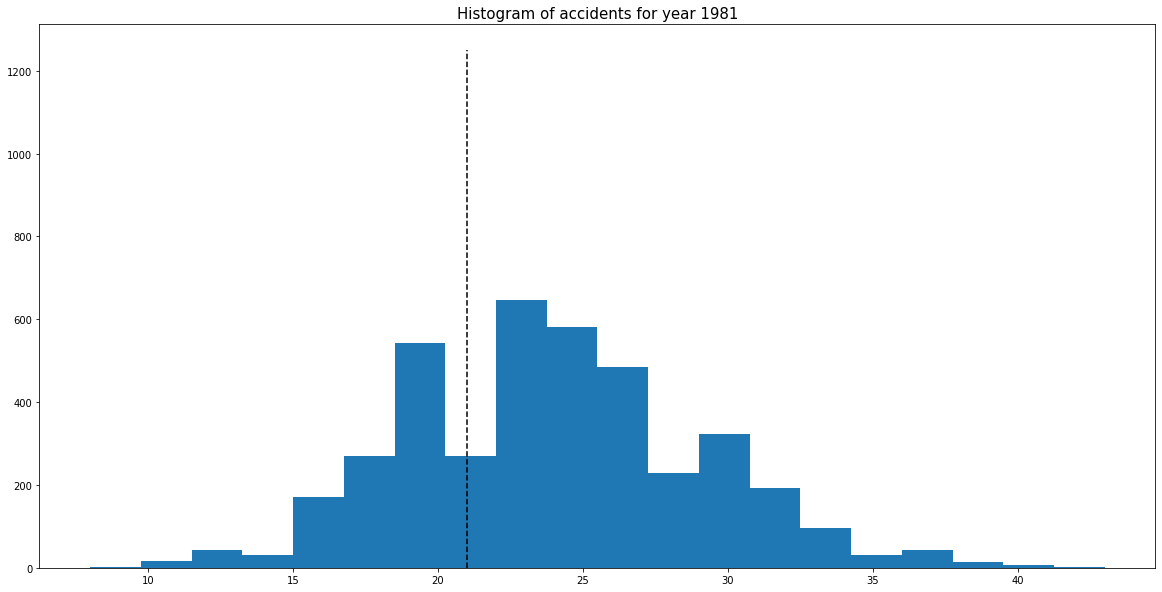

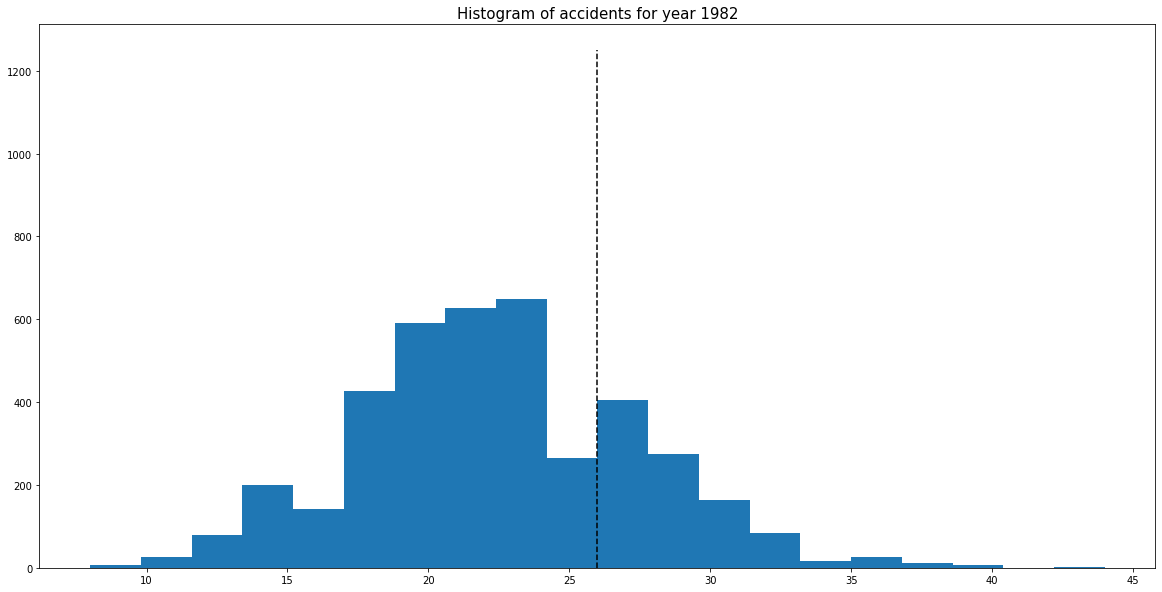

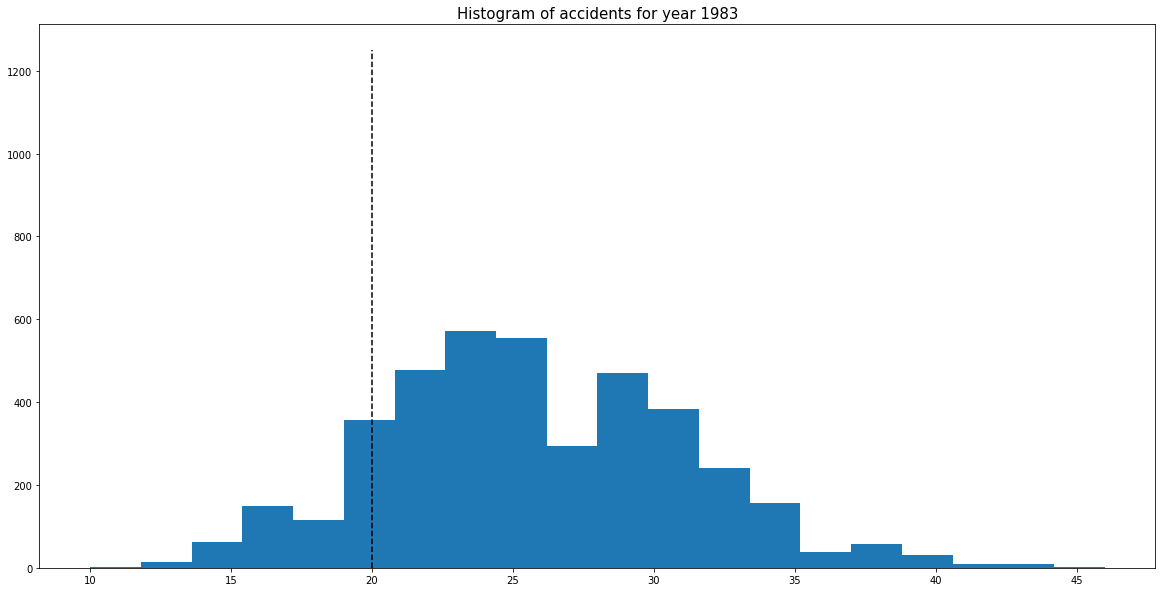

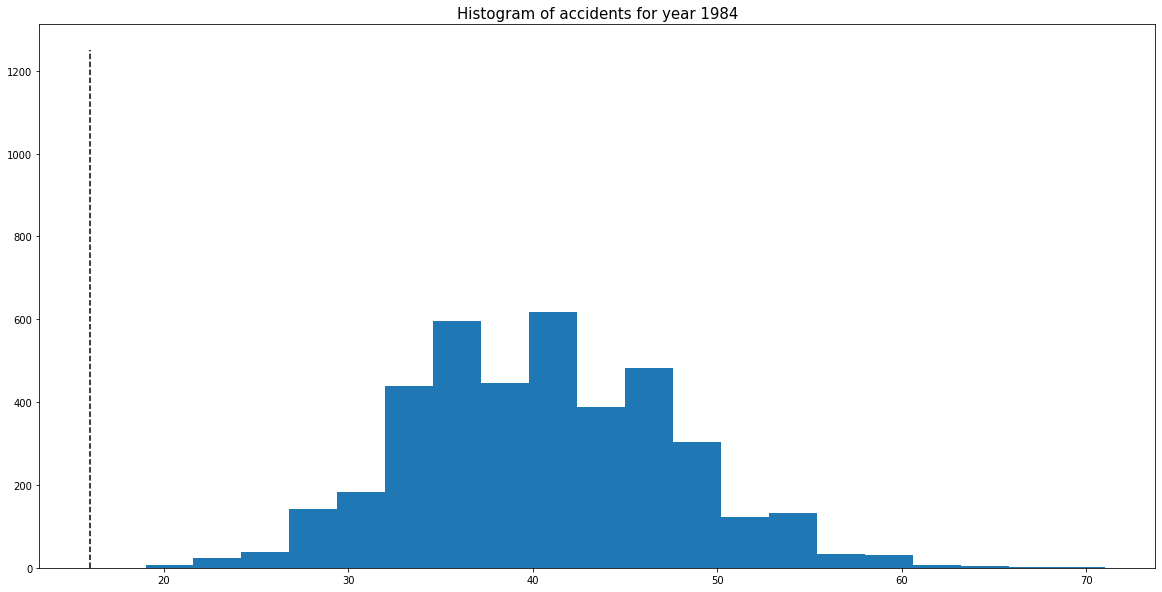

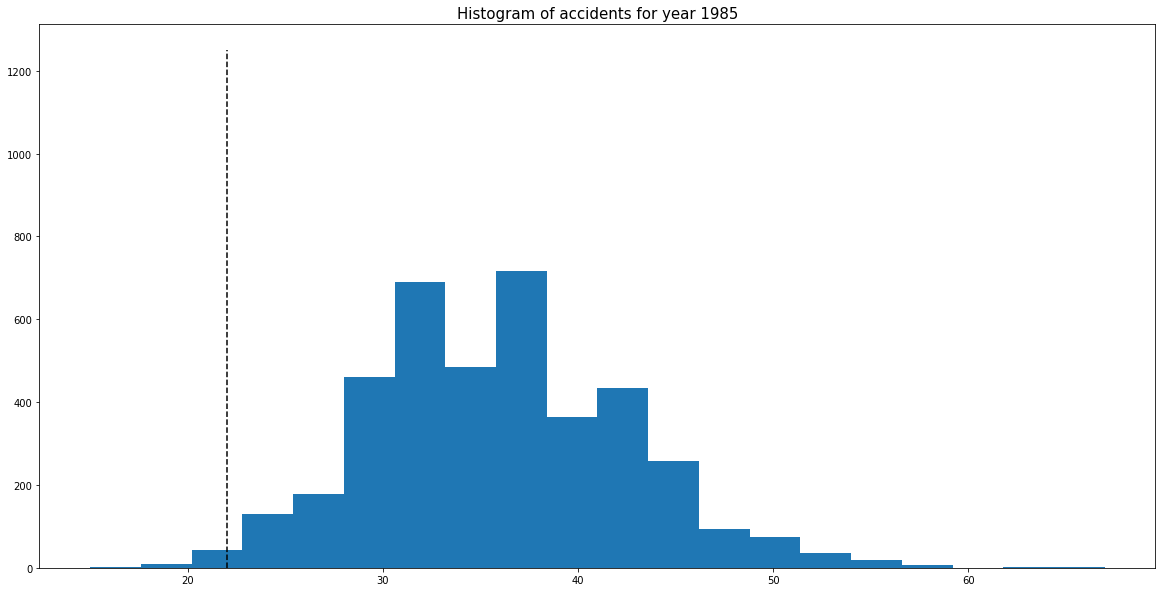

In [43]:
model_3=CmdStanModel(stan_file='lab5_3.stan')
data = {'N': df.shape[0], 'miles': df["Miles flown [100 mln miles]"].values, 'y': df["Fatal accidents"].values}
fit=model_2.sample(data=data,seed=28052020)
df3 = fit.draws_pd()
for i in range (1,11):
    plt.figure(figsize = (20,10))
    plt.hist(df3["y_pred[{0}]".format(i)],bins=20)
    real_accidents = df['Fatal accidents'].iloc[i-1]
    plt.plot([real_accidents,real_accidents],[0,1250],linestyle='--',color='black')
    plt.title("Histogram of accidents for year {0}".format(1975+i),size = 15)
    plt.show()